In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Basics

1) Consider the problem of classifying 4 dimension features(unpadded).

Draw a network(on paper or something) of a neural network of 4 hidden layer where the first two hidden layers has 2 nodes each and last two has 3 nodes each.

2) What is the dimension for all the $W$ adn $b$?

3) Consider 
$$
    W^{[1]} = \begin{bmatrix}
        4 & 1 \\
        -3 & 3 \\
        2 & 3
    \end{bmatrix}
$$

$$
    b^{[1]} = \begin{bmatrix}
       1 \\
       2 \\
       -3 \\
    \end{bmatrix}
$$

and 

$$ W^{[2]} = \begin{bmatrix}
2 & 3 & 4
\end{bmatrix}
$$

$$
    b^{2} = \begin{bmatrix}
-2
\end{bmatrix}
$$

What does your network look like?

In [21]:
import numpy as np
from scipy.special import expit
w1 = np.array([
    [4.0, 1],
    [-3, 3],
    [2, 3]
])

b1 = np.array([[1.],
              [2.],
              [-3.]])



x = np.array([[1.],
              [2.]])

z1 = w1@x + b1

a1 = expit(z1)

w2 = np.array([[2, 3, 4]])
b2 = np.array([[-2]])

z2 = w2@a1 + b2
a2 = expit(z2)

# print(w1)
# print(b1)
# print(x)
# print(z1)
print(a1)
print(z2)
print(a2)

[[0.99908895]
 [0.99330715]
 [0.99330715]]
[[6.95132794]]
[[0.99904355]]


4) What is the probability of $x = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ to be of class 1.

5) Given two dimension feature find the weights for the network that returns 1 if $2x_1 + x_2 - 1 > 0$ AND $x_1 - x_2 - 1 > 0$

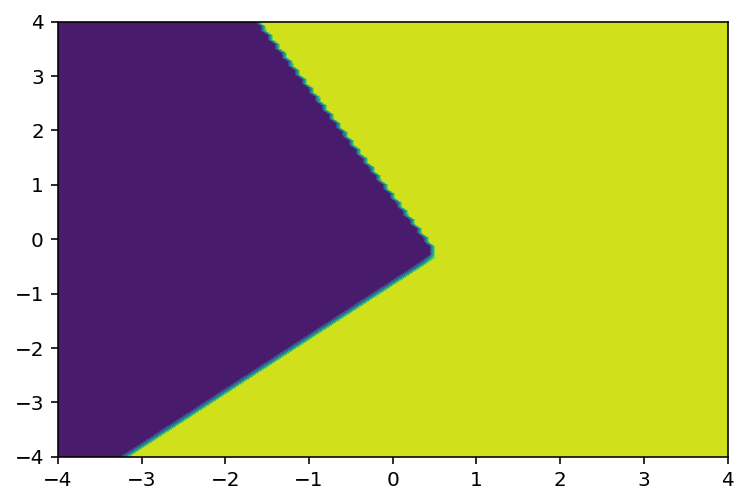

In [32]:
xs = np.linspace(-4, 4, 100)
ys = np.linspace(-4, 4, 100)

def f(x):
    w1 = np.array([[20, 10.],[10, -10]])
    b1 = np.array([[-10], [-10.]])
    w2 = np.array([[75, 75.]])
    b2 = np.array([[-100]])
    
    z1 = w1@x + b1
    a1 = expit(z1)
    
    z2 = w2@a1 + b1
    a2 = expit(z2)
    return a2[0][0]

Z = np.array([[f(np.array([[x], [y]])) for x in xs] for y in ys])

from matplotlib import pyplot as plt
plt.contourf(xs, ys, Z)

# Training

1) What's our cost function?

In [88]:
def split(w) -> 'w1, b1, w2, b2, w3, b3':
    w1 = w[0:8].reshape((4,2))
    b1 = w[8:12].reshape((4,1))
    
    w2 = w[12:20].reshape((2,4))
    b2 = w[20:22].reshape((2,1))
    
    w3 = w[22:24].reshape((1,2))
    b3 = w[24:25].reshape((1,1))
    return w1, b1, w2, b2, w3, b3

def predict(w, x):
    w1, b1, w2, b2, w3, b3 = split(w)
    a1 = expit(w1@x + b1)
    a2 = expit(w2@a1 + b2)
    a3 = expit(w3@a2 + b3)    
    return a3[0]

def cost(w):
    p = predict(w, xs)
    llh = np.empty(p.shape)
    llh[ys==1] = np.log(p[ys==1])
    llh[ys==0] = np.log1p(-p[ys==0])
    #print(llh)
    #llh = ys*np.log(p) + (1-ys)*np.log1p(-p)
    return -np.sum(llh)

np.random.seed(666)
testw = np.random.randn(25)
print(cost(testw))

# test_xs = np.array([[1,2,3],[4,5,6]])
# print(test_xs)
# predict(testw, test_xs)

72.8168270475148


In [89]:
from scipy.optimize import minimize
res = minimize(cost, testw)
print(res)
best_w = res.x

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log1p
/Users/piti/Library/Python/3.7/lib/python/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log1p
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log1p
/Users/piti/Library/Python/3.7/lib/python/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero enc

      fun: 12.642159840691065
 hess_inv: array([[ 3.71357821e+01, -1.67541129e+01,  2.37309517e+00,
         2.24486641e+00,  7.52664394e+02, -1.90269568e+03,
        -2.26678406e+01, -3.04650464e+01,  3.77163145e+01,
        -9.75016363e+00,  1.00106643e+03, -3.22197998e+01,
         8.66714899e+01, -6.66022620e+03, -6.86222125e+03,
        -3.56549655e+03,  2.98812114e+03, -7.18251532e+03,
         9.17035238e+02, -2.84247669e+03, -3.52059038e-01,
        -9.15319938e-01,  4.96345597e+03,  1.42781747e+03,
        -1.42700600e+03],
       [-1.67541129e+01,  7.61850718e+00, -1.42166140e+00,
        -1.17892389e+00, -3.40926931e+02,  8.62062239e+02,
         1.02593474e+01,  1.37439387e+01, -1.70260947e+01,
         5.32319071e+00, -4.53660196e+02,  1.45259309e+01,
        -3.91741978e+01,  3.01644294e+03,  3.10738993e+03,
         1.61549944e+03, -1.35379629e+03,  3.25294017e+03,
        -4.15518159e+02,  1.28876406e+03,  1.59393041e-01,
         3.88210649e-01, -2.24850478e+03, -6.471

In [90]:
print(predict(best_w, xs))
print(ys)

[9.99999998e-001 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 8.00973612e-001 6.38958675e-001
 1.00000000e+000 1.00000000e+000 9.76001533e-001 1.00000000e+000
 7.93803993e-001 1.00000000e+000 8.00973612e-001 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 6.13151131e-001
 8.00973612e-001 9.13133331e-001 7.59653750e-001 6.38958290e-001
 1.00000000e+000 8.00940946e-001 1.00000000e+000 6.38956939e-001
 9.93679384e-001 1.00000000e+000 1.00000000e+000 8.00973612e-001
 6.38957510e-001 5.31732867e-001 8.00973612e-001 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 8.00973612e-001 1.00000000e+000 1.71415225e-198 0.00000000e+000
 0.00000000e+000 0.00000000e+000 4.55295788e-003 0.00000000e+000
 0.00000000e+000 8.04040503e-001 0.00000000e+000 0.00000000e+000
 7.04605129e-001 7.086993

2) Consider the following dataset. 

We want to train a neural network 2 hidden layers where the first one has 4 nodes and second one with 2 nodes. How many parameters do we need in total?

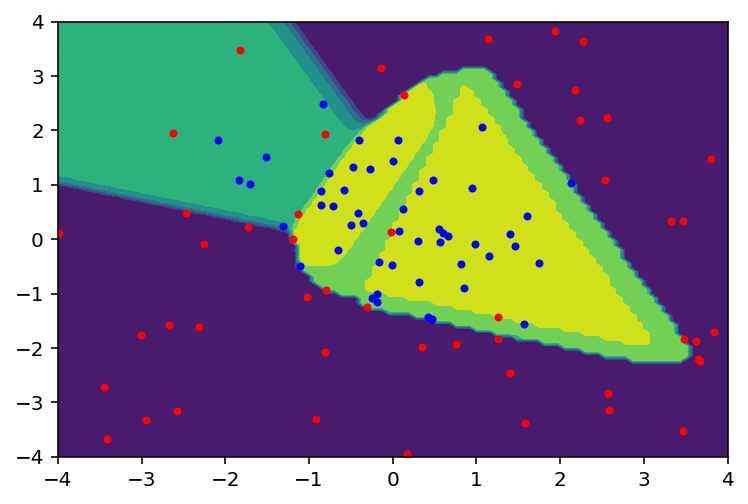

In [91]:
np.random.seed(999)
xs = np.hstack([np.random.randn(2,50), np.random.random(size=(2,50))*8-4])
ys = np.array([1]*50+[0]*50)

def draw_data():
    plt.plot(xs[0, ys==0], xs[1, ys==0], '.r')
    plt.plot(xs[0, ys==1], xs[1, ys==1], '.b')
    
draw_data()
xxs = np.linspace(-4, 4, 100)
yys = np.linspace(-4, 4, 100)
Z = np.array([[predict(best_w, np.array([[x], [y]]))[0] for x in xxs] for y in yys])
from matplotlib import pyplot as plt
plt.contourf(xxs, yys, Z)

3) Is initializing your initial weight with all 0 or all the same number a good idea?

In [41]:
xs.shape

(2, 100)

4) Given the following size information. Complete the following function.

In [ ]:
n_node = [4, 2, 1] # number of node in each layer
def compute_w_b_offset(layer_no):
    pass # fill this
    return w_offset, n_w, b_offset, n_b # this is so that we can slice off parameter

4) What implement the vectorized version of our cost function.

5) Use np.optimize.minimize to train your network. Check with contour plot.

In [19]:
class SadNeuralNetwork:
    def __init__(self):
        pass
    def train(self, xs, ys):
        pass
    def classify(self, xs):
        pass

# Back Propagation

1) Why minimize is a bad idea?

2) Write down the update rule (The recursion relation one)

3) For the rest of the week. Write back propagation. This should work for any size neural network.

Shouldn't take that long though. You will spend most of the time on trying to understand the relation above.

Do this once and use library for the rest of your life unless you want something super custom.

In [18]:
class NeuralNetwork:
    def __init__(self, n_nodes):
        pass
    
    def train(self, xs, ys, lmbda):
        #back prop
        pass
    
    def classify(self, xs):
        pass